In [80]:
import sympy as sp
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Returnerer tiderne knyttet til de første punkter over en given voltgrænse
def find_peaks(time_arr, voltage_arr, V_limit):
    peaks = []
    # For hvert peak finder vi det første punkt over en voltgrænse
    for i in range(len(voltage_arr)):
        # Tjek om punktet er over grænsen
        if voltage_arr[i] > V_limit:
            # Hvis det forrige punkt er under grænsen har vi fundet det første punkt over grænsen
            if voltage_arr[i - 1] < V_limit:
                peaks.append((time_arr[i]))

    return peaks

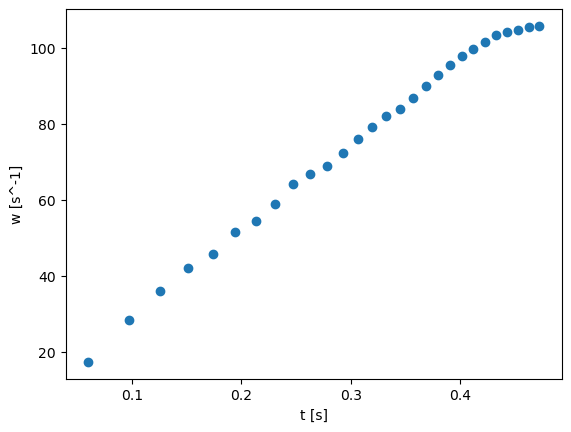

Parametre: [216.20246627  11.34474762  -1.05914451]
Usikkerhed på hver parameter: [0.46310699 0.12246663 0.01472408]


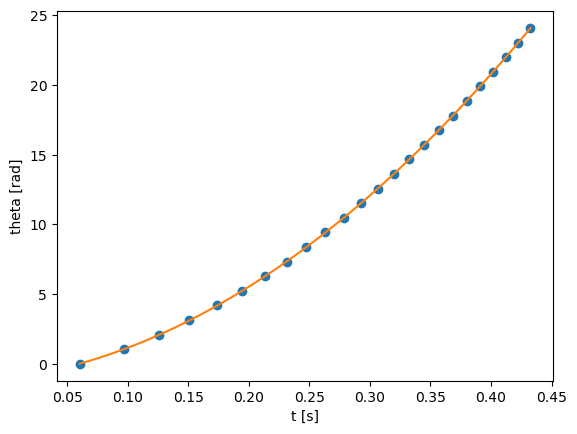

In [81]:
# Filstier
cyl_stor_r_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 faldmaskinen\data\cylinder store R.csv"

# Indlæs data fra csv-fil
cyl_stor_r = np.genfromtxt(cyl_stor_r_loc, delimiter=",", skip_header=1)
cyl_stor_r_t_arr = cyl_stor_r[:, 0]
cyl_stor_r_v_arr = cyl_stor_r[:, 1]

# Find peaks
cyl_stor_r_peaks = np.array(find_peaks(cyl_stor_r_t_arr, cyl_stor_r_v_arr, 3))

# Omregn til positive tider (træk t1 fra alle tider)
cyl_stor_r_peaks = cyl_stor_r_peaks - cyl_stor_r_peaks[0]

# Find forskellen mellem tiderne
cyl_stor_r_dt_arr = np.array(np.diff(cyl_stor_r_peaks))

cyl_stor_r_peaks = np.delete(cyl_stor_r_peaks, 0)

# Plot vinkelhastighedsgraf
plt.figure()
plt.plot(cyl_stor_r_peaks, ( np.pi/3)/cyl_stor_r_dt_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("w [s^-1]")
plt.show()

# Kasser de sidste fire punkter
cyl_stor_r_peaks = cyl_stor_r_peaks[:-4]
cyl_stor_r_dt_arr = cyl_stor_r_dt_arr[:-4]


cyl_stor_r_theta_arr = np.array([i for i in range(len(cyl_stor_r_peaks))]) * (np.pi/3)

plt.figure(2)
plt.plot(cyl_stor_r_peaks, cyl_stor_r_theta_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("theta [rad]")

# Fit til stedfunktion

def stedfunk(t, a, v_0, s_0):
    s = a/2 * t**2 + v_0 * t + s_0
    return s

stedfunk_params, stedfunk_cov = curve_fit(stedfunk, cyl_stor_r_peaks, cyl_stor_r_theta_arr)

# Plot fit
X = np.linspace(cyl_stor_r_peaks[0], cyl_stor_r_peaks[-1], 1000)
Y = stedfunk(X, *stedfunk_params)
plt.plot(X, Y)

sigma = np.sqrt(np.diagonal(stedfunk_cov))

print("Parametre: {}".format(stedfunk_params))
print("Usikkerhed på hver parameter: {}".format(sigma))




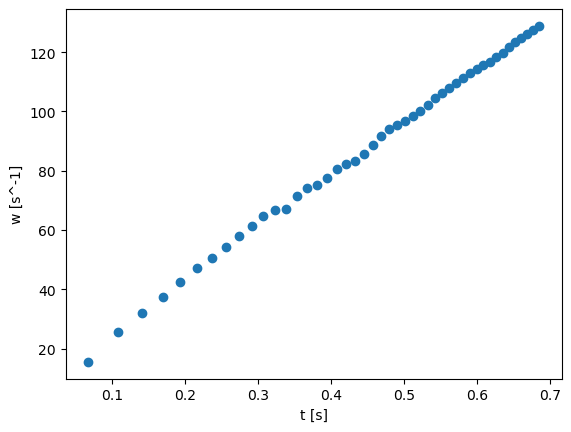

Parametre: [172.27142489  11.554478    -1.22857576]
Usikkerhed på hver parameter: [0.24942553 0.10347515 0.01957337]


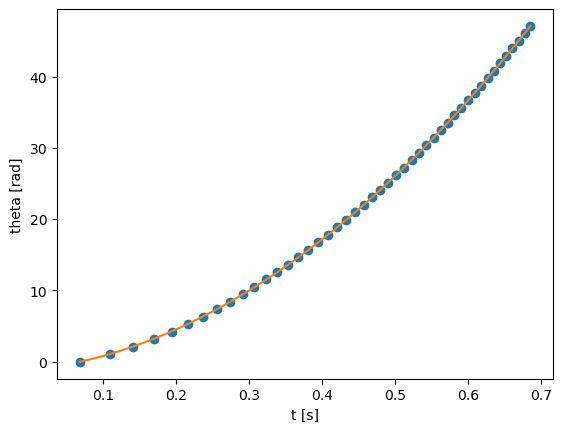

In [82]:
# Filstier
cyl_lille_r_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 faldmaskinen\data\cylinder lille R.csv"

# Indlæs data fra csv-fil
cyl_lille_r = np.genfromtxt(cyl_lille_r_loc, delimiter=",", skip_header=1)
cyl_lille_r_t_arr = cyl_lille_r[:, 0]
cyl_lille_r_v_arr = cyl_lille_r[:, 1]

# Find peaks
cyl_lille_r_peaks = np.array(find_peaks(cyl_lille_r_t_arr, cyl_lille_r_v_arr, 3))

# Omregn til positive tider (træk t1 fra alle tider)
cyl_lille_r_peaks = cyl_lille_r_peaks - cyl_lille_r_peaks[0]

# Find forskellen mellem tiderne
cyl_lille_r_dt_arr = np.array(np.diff(cyl_lille_r_peaks))

cyl_lille_r_peaks = np.delete(cyl_lille_r_peaks, 0)

# Plot vinkelhastighedsgraf
plt.figure()
plt.plot(cyl_lille_r_peaks, ( np.pi/3)/cyl_lille_r_dt_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("w [s^-1]")
plt.show()

cyl_lille_r_theta_arr = np.array([i for i in range(len(cyl_lille_r_peaks))]) * (np.pi/3)

plt.figure(2)
plt.plot(cyl_lille_r_peaks, cyl_lille_r_theta_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("theta [rad]")

# Fit til stedfunktion

def stedfunk(t, a, v_0, s_0):
    s = a/2 * t**2 + v_0 * t + s_0
    return s

stedfunk_params, stedfunk_cov = curve_fit(stedfunk, cyl_lille_r_peaks, cyl_lille_r_theta_arr)

# Plot fit
X = np.linspace(cyl_lille_r_peaks[0], cyl_lille_r_peaks[-1], 1000)
Y = stedfunk(X, *stedfunk_params)
plt.plot(X, Y)

sigma = np.sqrt(np.diagonal(stedfunk_cov))

print("Parametre: {}".format(stedfunk_params))
print("Usikkerhed på hver parameter: {}".format(sigma))





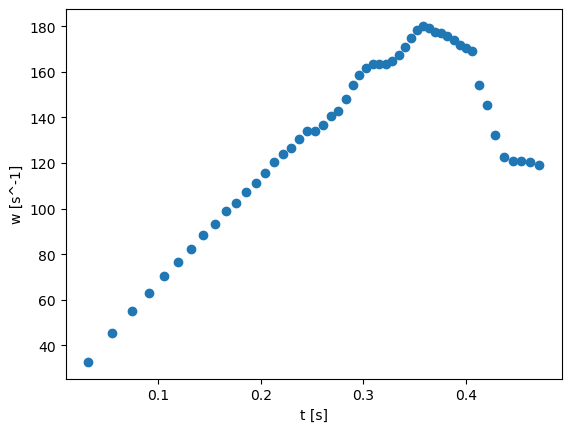

Parametre: [450.42265444  25.80774038  -1.06400411]
Usikkerhed på hver parameter: [0.55782523 0.08238047 0.00547818]


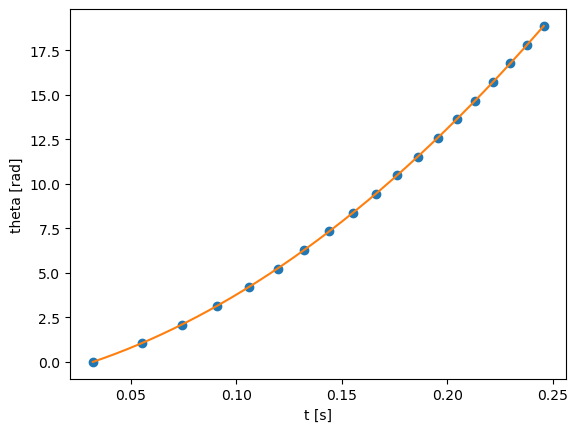

In [83]:
# Det her er IKKE inertimomentet af cylinderen
# Det er inertimomentet af systemet UDEN cylinderen
# Jeg blev bare træt af at ændre variablenavne

# Filstier
cyl_lille_r_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 faldmaskinen\data\uden objekt.csv"

# Indlæs data fra csv-fil
cyl_lille_r = np.genfromtxt(cyl_lille_r_loc, delimiter=",", skip_header=1)
cyl_lille_r_t_arr = cyl_lille_r[:, 0]
cyl_lille_r_v_arr = cyl_lille_r[:, 1]

# Find peaks
cyl_lille_r_peaks = np.array(find_peaks(cyl_lille_r_t_arr, cyl_lille_r_v_arr, 3))

# Omregn til positive tider (træk t1 fra alle tider)
cyl_lille_r_peaks = cyl_lille_r_peaks - cyl_lille_r_peaks[0]

# Find forskellen mellem tiderne
cyl_lille_r_dt_arr = np.array(np.diff(cyl_lille_r_peaks))

cyl_lille_r_peaks = np.delete(cyl_lille_r_peaks, 0)

# Plot vinkelhastighedsgraf
plt.figure()
plt.plot(cyl_lille_r_peaks, ( np.pi/3)/cyl_lille_r_dt_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("w [s^-1]")
plt.show()

# Behold kun de første 19 datapunkter
cyl_lille_r_peaks = cyl_lille_r_peaks[:19]
cyl_lille_r_dt_arr = cyl_lille_r_dt_arr[:19]

cyl_lille_r_theta_arr = np.array([i for i in range(len(cyl_lille_r_peaks))]) * (np.pi/3)

plt.figure(2)
plt.plot(cyl_lille_r_peaks, cyl_lille_r_theta_arr, "o")
plt.xlabel("t [s]")
plt.ylabel("theta [rad]")

# Fit til stedfunktion

def stedfunk(t, a, v_0, s_0):
    s = a/2 * t**2 + v_0 * t + s_0
    return s

stedfunk_params, stedfunk_cov = curve_fit(stedfunk, cyl_lille_r_peaks, cyl_lille_r_theta_arr)

# Plot fit
X = np.linspace(cyl_lille_r_peaks[0], cyl_lille_r_peaks[-1], 1000)
Y = stedfunk(X, *stedfunk_params)
plt.plot(X, Y)

sigma = np.sqrt(np.diagonal(stedfunk_cov))

print("Parametre: {}".format(stedfunk_params))
print("Usikkerhed på hver parameter: {}".format(sigma))



